Resources:

[Zhihu: Automatic Differentiation Algorithm](https://zhuanlan.zhihu.com/p/60048471)

[Zhihu: Manual Automatic Differentiation](https://zhuanlan.zhihu.com/p/161635270)

[MLE, MAP and Bayes](https://blog.csdn.net/u011508640/article/details/72815981)

Problems Waiting to Solve: 
- 3.2.6

Deserve to review
- 3.4.6(.1 & .2)


# 3. Linear Neural Networks

## 3.1. Linear Regression

Linear regression

training data set / training set

 -> sample / data point / data instance

 -> label / target
 
 -> feature / covariate
 

sample: $\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$

label: $y^{(i)}$

### 3.1.1. Basic Elements of Linear Regression


#### 3.1.1.1. Linear Model

$ \mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b. $

w: weight

b: bias / offset / intercept

**affine transformation** of input feature (linear transformation + translation)

Before finding model parameters, we need two other things: 
1. a quality **measure** for some given model; 
2. a **procedure for updating** the model to improve its quality.

#### 3.1.1.2. Loss Function

$
l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2
$
$
L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.
$

$
\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).
$

#### 3.1.1.3. Analytic Solution

minimize $\|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$

-> $\mathbf{w}^* = (\mathbf X^\top \mathbf X)^{-1}\mathbf X^\top \mathbf{y}.$

While simple problems like linear regression may admit analytic solutions, we should not get used to such good fortune. Although analytic solutions allow for nice mathematical analysis, the requirement of an analytic solution is so restrictive that it would exclude all of deep learning.

#### 3.1.1.4. Minibatch Stochastic Gradient Descent

Gradient descent (Theory from: Taylor's theorem/Formula)

One of the variant of GD: minibatch stochastic GD

$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).
$

$ \mathcal{B}: $ number of batched data

In linear case: 
$\begin{split}\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}\end{split}
$
Repeat Iterate

$\mathcal{B}$: Batch Size

$\eta$: Learning Rate

Hyperparameter / Hyperparameter Tuning

However, for more complicated models, like deep networks, the loss surfaces contain many minima(need tuning/other IDK techniques  to find).

Generalization is even harder than minimize the loss on training dataset.

-> [Empirical Error/ Generalization Error/ Bias/ Variance / Overfitting & Underfitting/ Cross Validation](https://blog.csdn.net/zhihua_oba/article/details/78684257)

#### 3.1.1.5. Making Predictions with the Learned Model

Prediction versus Inference

We will try to stick with prediction because calling this step inference, despite emerging as standard jargon in deep learning, is somewhat of a misnomer. In statistics, inference more often denotes estimating parameters based on a dataset. This misuse of terminology is a common source of confusion when deep learning practitioners talk to statisticians.

### 3.1.2. Vectorization for Speed


In [2]:
import math
import time
import numpy as np
import torch

In [3]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [4]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [23]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.07360 sec'

In [24]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00035 sec'

### 3.1.3. The Normal Distribution and Squared Loss

$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right). $

In [20]:
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma ** 2)
    return p * np.exp(-0.5 / sigma **2 * (x - mu)**2) #很显然 这里用np是因为函数要进行向量化/张量化运算

In [26]:
from MyPackage.lineplot import plot

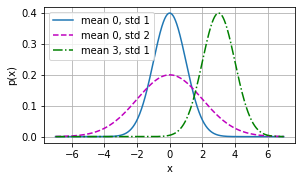

In [30]:
# 再次使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

One way to motivate linear regression with the mean squared error loss function (or simply squared loss) is to formally assume that observations arise from noisy observations, where the noise is normally distributed as follows:
$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon \text{ where } \epsilon \sim \mathcal{N}(0, \sigma^2).
$


Thus, we can now write out the likelihood of seeing a particular  𝑦  for a given  𝐱  via
$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right).
$

Now, according to the principle of maximum likelihood, the best values of parameters  𝐰  and  𝑏  are those that maximize the likelihood of the entire dataset:
$P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}).
$

For historical reasons, optimizations are more often expressed as minimization rather than maximization. So, without changing anything we can minimize the negative log-likelihood.
$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.
$


### 3.1.4. From Linear Regression to Deep Networks


#### 3.1.4.1. Neural Network Diagram

![LinearRegressionPicture](Image/1.png)

Feature Dimensionality: d

Note that the input values are all given and there is just a single computed neuron. Focusing on where computation takes place, conventionally we do not consider the input layer when counting layers. 

#### 3.1.4.2. Biology


![Real Neuron](Image/2.png)

### 3.1.5 Summary

- Key ingredients in a machine learning model are training data, a loss function, an optimization algorithm, and quite obviously, the model itself.

- Vectorizing makes everything better (mostly math) and faster (mostly code).

- Minimizing an objective function and performing maximum likelihood estimation can mean the same thing.

- Linear regression models are neural networks, too.

此外要注意最小二乘法和最大似然的理论假设不同 在线性中正好是相似结果 最大似然需要的是知道数据的概率分布函数

可以参见一下这个链接 https://blog.csdn.net/xidianzhimeng/article/details/20847289

### 3.1.6 Exercises


#### Q1.

1. $y = \sum_i(x_i-b)^2 = nb^2 - 2nb \sum_ix_i +\sum_ix_i^2\\
 \frac{\partial y}{\partial b} = 2nb - 2 \sum_i x_i  = 0 \\ 
 b = \frac{\sum_i x_i }{n}
   $

2. 
$ y = \sum_i (x_i-b)^2 \iff  \mathbf{X}-\mu
$
$\mu$ is the variance in normal distribution

#### Q2.

![from应用回归分析](Image/3.png)

随机梯度下降：过于复杂优化问题中(损失函数矩阵$\mathbf{X}$不可逆) 求导数为0会变得异常复杂 简直就是小丑一样，这时就需要使用随机梯度下降，梯度下降算法就是利用泰勒展开式得到损失函数的近似方程，通过合理的tuning超参选择就可以达到展开式符合理论近似的效果。而算力问题则使得mini batch stochastic gradient decent 更为流行。

#### Q3.

这题则是考虑最大似然的理解： 已知概率分布，使得符合这样概率密度来估计最有可能的参数。
$\mathcal{L}(\mathbf{X}|y)=P(y|\mathbf{X})
$

[这篇写得巨顶](https://blog.csdn.net/u011508640/article/details/72815981)

本题中$\epsilon$符合$P(\epsilon)=\frac{1}{2}exp(-|\epsilon|)
$

即$\prod P(y-\mathbf{X}w|\mathbf {X}) = \prod\frac{1}{2}exp(-|y-\mathbf{X}w|)
$

取-log
$ log(2n) + \sum_i |y^{(i)}-w^\top x^{(i)}|
$
第二项就是损失函数

这个损失函数是绝对值函数 意思是到stationary poiont附近不可导 不可导求不了matrix

## 3.2. Linear Regression Implementation from Scratch

In [104]:
import random
import torch
import matplotlib.pyplot as plt
import numpy as np
from MyPackage import lineplot

为什么都要封装再实现：因为这是pytorch的特性，这么学有利于理解torch

### 3.2.1. Generating the Dataset

In [106]:
def synthetic_data (w, b, num_examples): #@save
    """生成y=Xw+b+noise"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) #手动添加y的noise
    return X, y.reshape((-1,1))


In [107]:
#测试下torch.normal()
torch.normal(0, 1,(2, 5))

tensor([[ 0.3122, -0.6238,  0.6383,  1.7209,  0.4706],
        [ 0.1624, -0.4663,  0.6448,  1.1209, -0.0757]])

In [108]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [109]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.3197,  0.8556]) 
label: tensor([0.6716])


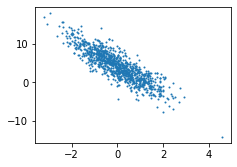

In [110]:
lineplot.set_figsize()
plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1) # 没有区别 为啥要detach?

这里的tensor.detach()跟计算图有关 后面会学到

2.5节也有说detach的作用：[detach computation of gradient](https://d2l.ai/chapter_preliminaries/autograd.html#detaching-computation)

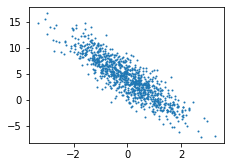

In [62]:
# lineplot.set_figsize()
# plt.scatter(features[:(1)].numpy(),labels.numpy(), 1)

### 3.2.2. Reading the Dataset


这一步我们实现了minibatch的步骤之一

In [127]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) #给所有样本贴标签
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        # 牛 还考虑到了batch_size比num_example大的情况
        yield features[batch_indices], labels[batch_indices]
        # 这里用yield，有点像print或者return。 不同的是yield将函数变成了迭代器 
        # 这个函数取名data_iter也很精髓

In [128]:
c= [1,2,3,4,5]
random.shuffle(c)
c

[2, 5, 3, 4, 1]

In [129]:
batch_size = 10
for X,y in data_iter(batch_size, features, labels):
    print(X,'\n',y)
    break

tensor([[-1.1752, -0.7130],
        [ 0.9721, -0.5918],
        [-0.2672,  1.1462],
        [-1.2400,  0.7889],
        [ 0.4929, -0.1629],
        [-0.2034, -1.1329],
        [ 0.7142, -1.9961],
        [-0.1809,  0.4252],
        [-0.7257,  0.5402],
        [-0.3819, -0.8582]]) 
 tensor([[ 4.2651],
        [ 8.1533],
        [-0.2138],
        [-0.9619],
        [ 5.7435],
        [ 7.6413],
        [12.4102],
        [ 2.3640],
        [ 0.9210],
        [ 6.3601]])


### 3.2.3. Initializing Model Parameters


In [139]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
# w = torch.zeros((2, 1),requires_grad=True) #Exercise Q1.1
b = torch.zeros(1, requires_grad=True)

### 3.2.4. Defining the Model


In [140]:
def lineRegre(X, w, b):
    '''The linear regression model'''
    return torch.matmul(X,w) + b

### 3.2.5. Defining the Loss Function


In [141]:
def squared_losee(y_hat, y): #@save
    return (y_hat - y.reshape(y_hat.shape)) **2 /2

### 3.2.6. Defining the Optimization Algorithm


In [142]:
def sgd(params, lr, batch_size): #@save
    '''Minibatch stochastic gradient decent'''
    with torch.no_grad():
    # with torch.no_grad()主要是用于停止autograd模块的工作，以起到加速和节省显存的作用，
    # 具体行为就是停止gradient计算，从而节省了GPU算力和显存，但是并不会影响dropout和batchnorm层的行为
        for param in params:
            param -= lr * param.grad /batch_size
            param.grad.zero_()
            #这里还有点搞不懂 .grad.zero_()和.grad.zero()的区别
  

### 3.2.7. Training


In [143]:
lr = 0.03
num_epochs = 3
net = lineRegre
loss = squared_losee

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels): #这里之前用yield定义的迭代器就起到作用了
        l = loss(net(X, w, b), y) # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        # print(l)
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels) #算最终的loss
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')


epoch 1, loss 0.030140
epoch 2, loss 0.000105
epoch 3, loss 0.000049


Comparing with the real parameter(Remember we generate the data manualy?).

In [135]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0004, -0.0002], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0002], grad_fn=<RsubBackward1>)


### 3.2.8. Summary


- We saw how a deep network can be implemented and optimized from scratch, using just tensors and auto differentiation, without any need for defining layers or fancy optimizers.

- This section only scratches the surface of what is possible. In the following sections, we will describe additional models based on the concepts that we have just introduced and learn how to implement them more concisely.

### 3.2.9 Exercises

#### Q1

有可能需要更多epoch 线性回归里没太大影响

#### Q2

可以

#### Q3

[Planck's law](https://en.wikipedia.org/wiki/Planck%27s_law)

应该也可，知道distribution了 至少有个Confident interval吧

#### Q4

我现在能想到的 二阶导数不存在 如原函数为y=|x|的积分

#### Q5

#### Q6

Different Learning Rate:

![](Image/4.gif)

#### Q7

如果总的训练集的Size不能被batchSize整除，就会出现网络输入数据的Size和生成的随机变量的size在Batchsize那个维度上不匹配的问题，从而报错。

## 3.3. Concise Implementation of Linear Regression

### 3.3.1. Generating the Dataset


In [2]:
import numpy as np
import torch
from torch.utils import data
import torch

In [3]:
def synthetic_data (w, b, num_examples): #@save
    """生成y=Xw+b+noise"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape) #手动添加y的noise
    return X, y.reshape((-1,1))


In [4]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

### 3.3.2. Reading the Dataset

In [5]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)
# 在实际的大数据处理中 不需要这么读取数据 不然内存会爆掉的

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [6]:
next(iter(data_iter))

[tensor([[-2.1472, -0.3730],
         [-0.1424,  0.1840],
         [ 0.3231, -0.5758],
         [-1.0374, -0.5074],
         [-0.3060, -0.5498],
         [ 1.6460,  0.9777],
         [ 0.6298, -0.4698],
         [-0.1503,  0.2282],
         [-0.0037,  1.5753],
         [-0.6724,  1.0765]]),
 tensor([[ 1.1728],
         [ 3.2699],
         [ 6.7943],
         [ 3.8646],
         [ 5.4580],
         [ 4.1698],
         [ 7.0639],
         [ 3.1352],
         [-1.1629],
         [-0.7894]])]

### 3.3.3. Defining the Model

Standard workflow: Sequential

In [94]:
# nn是神经网络的缩写
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))
# Sequential是一个放置不同层的容器 先这么理解

### 3.3.4. Initializing Model Parameters

In [95]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

### 3.3.5. Defining the Loss Function

In [96]:
loss = nn.MSELoss()
# loss = nn.MSELoss(reduction='sum') Q1
# loss = nn.HuberLoss()

### 3.3.6. Defining the Optimization Algorithm

In [97]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)
# trainer = torch.optim.SGD(net.parameters(), lr=0.03/batch_size) Q1

### 3.3.7. Training

In [98]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step() # 更新参数 trainer这个词有点难理解 直接写成optimizer爽一点
    l = loss(net(features), labels) # 每更新完一个epoch 算一下loss
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000281
epoch 2, loss 0.000101
epoch 3, loss 0.000102


### 3.3.8. Summary

Using PyTorch’s high-level APIs, we can implement models much more concisely.

In PyTorch, the data module provides tools for data processing, the nn module defines a large number of neural network layers and common loss functions.

We can initialize the parameters by replacing their values with methods ending with _.

### 3.3.9. Exercises

#### Q1

若是从总损失替换成平均值 则学习率要乘batch_size(假设之前的learning rate正合适)

因为在step更新参数环节 W[:] = W $- lr * \frac{\partial{loss}}{\partial{W}}$

这里loss从每个batch的sum loss, 变成了每个batch的average loss 故而如果之前的lr合适 这里要乘batch_size

值得注意的是 MSEloss默认返回的是mean

#### Q2

[Pytorch Documentation](https://pytorch.org/docs/stable/index.html)

[Search Result](https://pytorch.org/docs/stable/search.html?q=nn.+loss&check_keywords=yes&area=default#)

\begin{split}l(y,y') = \begin{cases}|y-y'| -\frac{\sigma}{2} & \text{ if } |y-y'| > \sigma \\ \frac{1}{2 \sigma} (y-y')^2 & \text{ 其它情况}\end{cases}\end{split}

#### Q3 

In [106]:
print(net[0].weight.grad) 

tensor([[1.3178e-05, 2.6392e-03]])


## 3.4. Softmax Regression

### 3.4.1. Classification Problem


one-hot encoding

### 3.4.2. Network Architecture

Multipul outputs -> estimate conditional probablity 

\begin{split}\begin{aligned}
o_1 &= x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + b_1,\\
o_2 &= x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + b_2,\\
o_3 &= x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + b_3.
\end{aligned}\end{split}

![6](Image/6.png)

### 3.4.3. Parameterization Cost of Fully-Connected Layers

By setting heperparameter $n$:cost trasforming $\mathcal{O}(dq) \to \mathcal{O}(\frac{dq}{n})$

$d$ inputs, $q$ outputs

### 3.4.4. Softmax Operation

$\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o})\quad \text{where}\quad \hat{y}_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}.
$
$P(y=j|\mathbf{x}) = \frac{e^{\mathbf{x}^\mathsf{T}\mathbf{w}_j}}{\sum_{k=1}^K e^{\mathbf{x}^\mathsf{T}\mathbf{w}_k}}
$
Although softmax is a nonlinear function, the outputs of softmax regression are still *determined* by an affine transformation of input features; thus, softmax regression is a linear model.

### 3.4.5. Vectorization for Minibatches


![7](Image/7.png)

### 3.4.6 Loss Function

#### 3.4.6.1. Log-Likelihood

Given the data, what is the value of weight $\mathbf{W}$ with the largest probablity resulting these data observation.

$-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^n -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)})
$

$  -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})= l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)})
$

![8](Image/8.png)

$l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j
$

Using likelyhood formula to construct loss function , coincidently same as cross entropy formula

$\frac{\partial-\log\hat{y}_y}{\partial \hat{y}} = \hat{y}_y
$

#### 3.4.6.2. Softmax and Derivatives


$\begin{split}\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}}) &=  - \sum_{j=1}^q y_j \log \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} \\
&= \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j\\
&= \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j.
\end{aligned}\end{split}
$

Without normalization:
$\partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j
$

In other words, the derivative is the difference between the probability assigned by our model, as expressed by the softmax operation, and what actually happened, as expressed by elements in the one-hot label vector. In this sense, it is very similar to what we saw in regression, where the gradient was the difference between the observation  𝑦  and estimate  𝑦̂  . This is not coincidence. In any exponential family (see the online appendix on distributions) model, the gradients of the log-likelihood are given by precisely this term. This fact makes computing gradients easy in practice.

#### 3.4.6.3. Cross-Entropy Loss

### 3.4.7. Information Theory Basics

#### 3.4.7.1. Entropy

#### 3.4.7.2. Surprisal

#### 3.4.7.3. Cross-Entropy Revisited

### 3.4.8. Model Prediction and Evaluation

### 3.4.9. Summary

- The softmax operation takes a vector and maps it into probabilities.

- Softmax regression applies to classification problems. It uses the probability distribution of the output class in the softmax operation.

- Cross-entropy is a good measure of the difference between two probability distributions. It measures the number of bits needed to encode the data given our model.

### 3.4.10 Exercises

#### Q1